# __Predicting Airbnb Listing Prices in Sydney__

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- This task includes a set of instructions/ questions listed below along with comprehensive explanations. 




In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Configure seaborn aesthetics
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [3]:
# Load datasets
df_train = pd.read_csv(r"C:\Users\haiho\GITHUB\Sydney-Airbnb-prices-prediction\data\raw\train.csv")
df_test = pd.read_csv(r"C:\Users\haiho\GITHUB\Sydney-Airbnb-prices-prediction\data\raw\test.csv")

**Step 1**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms.

Even though the descriptive statistics summary provided by the initial data analysis includes 34 features, we can identify other 3 numerical variables are in the format of string and should be corrected for further analyis. `host_response_rate` and `host_acceptance_rate` are the two features which contain both numerical values and text on each entry, specfically number with percentage symbol (%). Since the intial data types of these two columns are string, we need to convert them to float after extracting the unwanted character. 

In [5]:
# List of data frames and columns to check
dfs = [df_train, df_test]
columns = ['host_response_rate', 'host_acceptance_rate']

# Loop through data frames and columns
for df in dfs:
    for col in columns:
        print(type(df[col]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [6]:
# Remove unwanted characters 
for df in dfs:
    for col in columns:
        df[col] = df[col].str.replace('%', '')

In [7]:
# Transform data columns into float type
for df in dfs:
    for col in columns:
        df[col] = df[col].astype(float)

Besides, `price` as the target variable of the training dataset is also not denoted as a floating point attribute due to the same initial data type. By repeating the procedure, we can convert price to the accurate data type.

In [8]:
# Examine the current data type
print(type(df_train['price']))

<class 'pandas.core.series.Series'>


In the form of string, we can spot the shortest and longest values to determine any unexpected characters.

In [9]:
print("Min value:", min(df_train['price'], key=len))
print("Max value:", max(df_train['price'], key=len))

Min value: $82.00
Max value: $2,746.00


We only want to keep the numeric values and remove the unwanted characters before changing to float.

In [12]:
# Remove unwanted characters 
df_train['price'] = df_train['price'].str.replace('$', '').str.replace(',', '')

In [13]:
# Transform price into float type
df_train['price'] = df_train['price'].astype(float)

**Step 2:** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `reviews`, `jumio`, etc. from feature `host_verifications`.  

We firstly examine the top 2 entries of the `host_verifications` feature.

In [18]:
df_train['host_verifications'].head(2)

0    ['email', 'phone', 'reviews', 'jumio', 'offlin...
1    ['email', 'phone', 'facebook', 'reviews', 'jum...
Name: host_verifications, dtype: object

From feature `host_verifications`, the total numbers of 4 new features can be identified:

In [19]:
#value counts of major verification
for i in ['email', 'phone', 'reviews', 'jumio']:
    count = 0
    for row in df_train.itertuples(index = True, name ='Pandas'):
        if i in getattr(row, 'host_verifications'):
            count+=1
    print('Value counts of',i,'verifications :',count)      

Value counts of email verifications : 6495
Value counts of phone verifications : 6995
Value counts of reviews verifications : 4429
Value counts of jumio verifications : 4795


By properly designing 4 functions, 4 new features are created to indicate whether an Airbnb has `email` or `phone` or `reviews` or `jumio`.

In [20]:
#for email verifications 
def email_veri(row):
    for i in range(len(row)):
        if 'email' in row['host_verifications']:
            return 1 
        else: 
            return 0
#for phone verifications 
def phone_veri(row):
    for i in range(len(row)):
        if 'phone' in row['host_verifications']:
            return 1 
        else: 
            return 0
#for reviews verifications 
def reviews_veri(row):
    for i in range(len(row)):
        if 'reviews' in row['host_verifications']:
            return 1 
        else: 
            return 0 
#for jumio verifications 
def jumio_veri(row):
    for i in range(len(row)):
        if 'jumio' in row['host_verifications']:
            return 1 
        else: 
            return 0

In [21]:
#apply to the training set
df_train['email'] = df_train.apply(email_veri, axis=1)
df_train['phone'] = df_train.apply(phone_veri, axis=1)
df_train['reviews'] = df_train.apply(reviews_veri, axis=1)
df_train['jumio'] = df_train.apply(jumio_veri, axis=1)

In [22]:
#apply to the test set
df_test['email'] = df_test.apply(email_veri, axis=1)
df_test['phone'] = df_test.apply(phone_veri, axis=1)
df_test['reviews'] = df_test.apply(reviews_veri, axis=1)
df_test['jumio'] = df_test.apply(jumio_veri, axis=1)

In [23]:
#drop the original column
df_train.drop(columns='host_verifications', inplace=True)
df_test.drop(columns='host_verifications', inplace=True)

We also identify that the `amenities` feature has multiple items of information which need to be separated.

In [24]:
df_train['amenities'].head(2)

0    ["Hot water", "Coffee maker", "Heating", "Hair...
1    ["Hot water", "Coffee maker", "Long term stays...
Name: amenities, dtype: object

By finding the longest entry of `amenities` and the top 4 amenities of all Airbnb entries, we can determine the 4 new features to generate.

In [25]:
longest_list = max(df_train['amenities'], key=len)
longest_list

'["Clothing storage: wardrobe, walk-in closet, and dresser", "Hot water", "Coffee maker", "Free dryer \\u2013 In building", "Toaster", "Heating", "Long term stays allowed", "Extra pillows and blankets", "Dining table", "Private fenced garden or backyard", "Bikes", "Hair dryer", "Conditioner", "Drying rack for clothing", "Babysitter recommendations", "Laundromat nearby", "Fire pit", "Bathtub", "Oven", "Private entrance", "Lockbox", "Beach essentials", "Dedicated workspace: monitor, desk, table, and office chair", "Bread maker", "Ceiling fan", "Microwave", "Iron", "Free washer \\u2013 In building", "68\\" HDTV with Amazon Prime Video, Apple TV, Netflix, standard cable", "Refrigerator", "Outdoor shower", "Board games", "Fire extinguisher", "Hot water kettle", "Piano", "Samsung Bar Bluetooth sound system", "Children\\u2019s dinnerware", "Stove", "Portable fans", "Ethernet connection", "Bed linens", "Game console", "Cable TV", "Hangers", "Pack \\u2019n play/Travel crib", "BBQ grill", "Body 

In [26]:
df_train.index[df_train['amenities']==longest_list].tolist()

[967]

In [27]:
for i in ["Clothing storage: wardrobe, walk-in closet, and dresser", "Hot water", "Coffee maker", "Free dryer \\u2013 In building", "Toaster", "Heating", "Long term stays allowed", "Extra pillows and blankets", "Dining table", "Private fenced garden or backyard", "Bikes", "Hair dryer", "Conditioner", "Drying rack for clothing", "Babysitter recommendations", "Laundromat nearby", "Fire pit", "Bathtub", "Oven", "Private entrance", "Lockbox", "Beach essentials", "Dedicated workspace: monitor, desk, table, and office chair", "Bread maker", "Ceiling fan", "Microwave", "Iron", "Free washer \\u2013 In building", "68\\ HDTV with Amazon Prime Video, Apple TV, Netflix, standard cable", "Refrigerator", "Outdoor shower", "Board games", "Fire extinguisher", "Hot water kettle", "Piano", "Samsung Bar Bluetooth sound system", "Children\\u2019s dinnerware", "Stove", "Portable fans", "Ethernet connection", "Bed linens", "Game console", "Cable TV", "Hangers", "Pack \\u2019n play/Travel crib", "BBQ grill", "Body soap", "First aid kit", "Smoke alarm", "Room-darkening shades", "Luggage dropoff allowed", "Private patio or balcony", "Essentials", "Cooking basics", "Barbecue utensils", "Baking sheet", "Outdoor furniture", "Outdoor dining area", "Private outdoor saltwater pool", "Wifi", "Free street parking", "Dishwasher", "Freezer", "Nespresso machine", "Dishes and silverware", "Wine glasses", "Cleaning products", "Free parking on premises", "Shampoo", "Shower gel", "Children\\u2019s books and toys", "Kitchen", "Baby safety gates", "High chair", "Rice maker", "Trash compactor", "Mosquito net"]:
    count = 0
    for row in df_train.itertuples(index = True, name ='Pandas'):
        if i in getattr(row, 'amenities'):
            count+=1
    print('Value counts of',i,'amenity :',count)   

Value counts of Clothing storage: wardrobe, walk-in closet, and dresser amenity : 3
Value counts of Hot water amenity : 5506
Value counts of Coffee maker amenity : 2713
Value counts of Free dryer \u2013 In building amenity : 44
Value counts of Toaster amenity : 1229
Value counts of Heating amenity : 5067
Value counts of Long term stays allowed amenity : 6387
Value counts of Extra pillows and blankets amenity : 2957
Value counts of Dining table amenity : 1148
Value counts of Private fenced garden or backyard amenity : 357
Value counts of Bikes amenity : 41
Value counts of Hair dryer amenity : 5697
Value counts of Conditioner amenity : 997
Value counts of Drying rack for clothing amenity : 855
Value counts of Babysitter recommendations amenity : 271
Value counts of Laundromat nearby amenity : 608
Value counts of Fire pit amenity : 140
Value counts of Bathtub amenity : 1285
Value counts of Oven amenity : 3640
Value counts of Private entrance amenity : 2912
Value counts of Lockbox amenity 

Generally, the top 4 amenities to be recorded are: 'Long term stays allowed', 'Wifi', 'Essentials', 'Smoke alarm'. By apply the same function structure of creating verifications, 4 amenity features can be captured as below:

In [28]:
#for Long term stays allowed amenity 
def longterm_amenity(row):
    for i in range(len(row)):
        if 'Long term stays allowed' in row['amenities']:
            return 1 
        else: 
            return 0

#for Wifi amenity 
def wifi_amenity(row):
    for i in range(len(row)):
        if 'Wifi' in row['amenities']:
            return 1 
        else: 
            return 0

#for Essentials amenity 
def essentials_amenity(row):
    for i in range(len(row)):
        if 'Essentials' in row['amenities']:
            return 1 
        else: 
            return 0

#for Smoke alarm amenity 
def smokealarm_amenity(row):
    for i in range(len(row)):
        if 'Smoke alarm' in row['amenities']:
            return 1 
        else: 
            return 0

In [29]:
#apply to the train set
df_train['Long term stays allowed'] = df_train.apply(longterm_amenity, axis=1)
df_train['Wifi'] = df_train.apply(wifi_amenity, axis=1)
df_train['Essentials'] = df_train.apply(essentials_amenity, axis=1)
df_train['Smoke alarm'] = df_train.apply(smokealarm_amenity, axis=1)

In [30]:
#apply to the test set
df_test['Long term stays allowed'] = df_test.apply(longterm_amenity, axis=1)
df_test['Wifi'] = df_test.apply(wifi_amenity, axis=1)
df_test['Essentials'] = df_test.apply(essentials_amenity, axis=1)
df_test['Smoke alarm'] = df_test.apply(smokealarm_amenity, axis=1)

In [31]:
#drop the original column
df_train.drop(columns='amenities', inplace=True)
df_test.drop(columns='amenities', inplace=True)

**Question 3**: Impute missing values for all features in both training and test datasets.   

***For training dataset:***

In [32]:
df_train.shape

(7000, 67)

In [33]:
df_train.columns

Index(['ID', 'name', 'description', 'neighborhood_overview', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_sc

As different variables have specific characteristics including range, type, etc; different values should be utilized to impute missing values for all columns. Generally, while we can fill all misisng text variables with **'unknown'** value, numerical variables' missing values can be imputed with their **mode** or **mean** based on their characteristics. 

First, we start the imputing process with text-based columns:

In [34]:
textcol = ['name', 'description', 'neighborhood_overview', 'host_about', 'neighbourhood_cleansed', 'license']

In [35]:
df_train[textcol] = df_train[textcol].fillna(value='unknonwn')

We continue to handle numerical features which are divided into 2 categories. Specifically, specific features can be imputed with their most frequent values (mode) while the remaining features are filled with their average values (mean) instead. 

In [36]:
modefillcol = ['host_location','host_response_time', 'property_type', 'room_type','bathrooms']

In [37]:
modes = df_train[modefillcol].mode()
df_train[modefillcol] = df_train[modefillcol].fillna(value=modes.iloc[0])

In [38]:
meanfillcol = ['host_response_rate','host_acceptance_rate','bedrooms','beds','minimum_minimum_nights','maximum_maximum_nights','availability_365','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']

In [39]:
means = df_train[meanfillcol].mean()
df_train[meanfillcol] = df_train[meanfillcol].fillna(value=means.iloc[0])

However, by investigating thoroughout the dataset, we recognize that various numberical features should be in the form of integers instead of floatin point numbers. Therefore, they will be converted to the correct form for analysis purposes.

In [40]:
df_train[['bedrooms','beds','availability_365','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']] = df_train[['bedrooms','beds','availability_365','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']].astype(int)

***For test dataset:***

In [41]:
df_test.shape

(3000, 66)

We repeat the same process as for the training dataset so that misisng values of the test set can be appropriately imputed.

In [42]:
df_test[textcol] = df_test[textcol].fillna(value='unknonwn')

In [43]:
test_modes = df_test[modefillcol].mode()
df_test[modefillcol] = df_test[modefillcol].fillna(value=test_modes.iloc[0])

In [44]:
test_means = df_test[meanfillcol].mean()
df_test[meanfillcol] = df_test[meanfillcol].fillna(value=test_means.iloc[0])

In [45]:
df_test[['bedrooms','beds','availability_365','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']] = df_test[['bedrooms','beds','availability_365','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']].astype(int)

**Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 basic types + 'other': [entire rental unit, private room, entire room, entire towehouse, shared room, other] and then encode.  
(2 marks)

In [46]:
## Task 2, Question 4 Code Here
df_train['property_type'].value_counts()

Entire rental unit                     3066
Entire residential home                1164
Private room in residential home        680
Private room in rental unit             433
Entire guest suite                      262
Entire guesthouse                       217
Entire townhouse                        150
Room in boutique hotel                  123
Entire condominium (condo)              107
Entire serviced apartment                89
Private room in townhouse                84
Entire cottage                           62
Room in hotel                            59
Entire loft                              47
Private room in guest suite              39
Room in aparthotel                       38
Entire villa                             38
Private room in villa                    32
Entire bungalow                          30
Room in serviced apartment               27
Private room in guesthouse               27
Private room in condominium (condo)      22
Private room in hostel          

In [47]:
df_test['property_type'].value_counts()

Entire rental unit                     1222
Private room in rental unit             519
Entire residential home                 431
Private room in residential home        359
Private room in townhouse                62
Entire townhouse                         54
Entire guest suite                       43
Entire condominium (condo)               43
Shared room in rental unit               31
Entire guesthouse                        28
Private room in condominium (condo)      26
Shared room in residential home          17
Room in boutique hotel                   15
Entire villa                             15
Entire serviced apartment                14
Private room in villa                    11
Room in hotel                            10
Entire loft                               9
Shared room in hostel                     8
Private room in guest suite               8
Entire cottage                            8
Private room in bungalow                  6
Entire bungalow                 

After investigating the identified values of `property_type` of both datasets, it is evident to group values which are relevant to 'Private room', 'Shared room' and 'Entire room'. However, as it is difficult to idenify which values can be grouped together for 'Entire townhouse' or 'Entire rental unit', we need to specify lists of possible values and apply ordinal encodings.

In [48]:
e_townhouse = ['Entire villa', 'Entire residential home','Entire guest suite','Entire guesthouse','Entire bungalow','Tiny house','Entire place','Entire vacation home','Dome house','Earth house','Casa particular']
e_rentalunit = ['Entire serviced apartment', 'Entire loft', 'Entire rental unit', 'Entire condominium (condo)', 'Entire cottage']

In [49]:
#apply to the training set
for i in range(len(df_train)):
    if 'Private room' in df_train['property_type'].loc[i]:
        df_train['property_type'].loc[i]= 'Private room'
    if 'Shared room' in df_train['property_type'].loc[i]:
        df_train['property_type'].loc[i]= 'Shared room'
    if 'Room in' in df_train['property_type'].loc[i]:
        df_train['property_type'].loc[i]= 'Entire room'
    if df_train['property_type'].loc[i] in e_townhouse:
        df_train['property_type'].loc[i]= 'Entire townhouse'
    if df_train['property_type'].loc[i] in e_rentalunit:
        df_train['property_type'].loc[i]= 'Entire rental unit'

In [50]:
#apply to the test set
for j in range(len(df_test)):
    if 'Private room' in df_test['property_type'].iloc[j]:
        df_test['property_type'].iloc[j]= 'Private room'
    if 'Shared room' in df_test['property_type'].iloc[j]:
        df_test['property_type'].iloc[j]= 'Shared room'
    if 'Room in' in df_test['property_type'].iloc[j]:
        df_test['property_type'].iloc[j]= 'Entire room'
    if df_test['property_type'].iloc[j] in e_townhouse:
        df_test['property_type'].iloc[j]= 'Entire townhouse'
    if df_test['property_type'].iloc[j] in e_rentalunit:
        df_test['property_type'].iloc[j]= 'Entire rental unit'

Now that 5 basic types of Airbnb property have been identified, the remaining values can be assigned as 'Other'.

In [51]:
for i in range(len(df_train)):
    if df_train['property_type'].loc[i] not in ['Private room', 'Shared room','Entire room', 'Entire townhouse','Entire rental unit']:
        df_train['property_type'].loc[i] = 'Other'

In [52]:
for i in range(len(df_test)):
    if df_test['property_type'].iloc[i] not in ['Private room', 'Shared room','Entire room', 'Entire townhouse','Entire rental unit']:
        df_test['property_type'].iloc[i] = 'Other'

In [53]:
df_train['property_type'].value_counts()

Entire rental unit    3371
Entire townhouse      1892
Private room          1391
Entire room            255
Shared room             50
Other                   41
Name: property_type, dtype: int64

In [54]:
df_test['property_type'].value_counts()

Entire rental unit    1296
Private room          1014
Entire townhouse       584
Shared room             64
Entire room             30
Other                   12
Name: property_type, dtype: int64

In [55]:
df_train['price'].groupby(df_train['property_type']).mean()

property_type
Entire rental unit    240.258974
Entire room           229.866667
Entire townhouse      473.339852
Other                 482.634146
Private room           80.474479
Shared room            47.100000
Name: price, dtype: float64

As the target variable is `price`, we divide all identified values of `property_type` into 5 main groups based on the each type's average price in the descending order. 5 main types are 'entire rental unit', 'private room', 'entire room', 'entire townhouse', 'shared room' and the remaining types as 'other' and replace them in the dataset.

In [56]:
#map integer value
property_mapping = {'Other':6, 'Entire townhouse':5, 'Entire rental unit':4, 'Entire room':3, 'Private room':2, 'Shared room':1}
df_train['map_property_type'] = df_train['property_type'].map(property_mapping)
df_test['map_property_type'] = df_test['property_type'].map(property_mapping)

In [57]:
#drop the original column after mapping 
df_train.drop(columns=['property_type'],inplace=True)
df_test.drop(columns=['property_type'],inplace=True)

In [58]:
df_train['bathrooms'].value_counts()

1 bath               3614
2 baths              1065
1 shared bath         601
1 private bath        459
1.5 baths             326
3 baths               223
2.5 baths             222
1.5 shared baths      117
2 shared baths        113
3.5 baths              65
4 baths                58
3 shared baths         32
2.5 shared baths       19
0 shared baths         12
5 baths                11
4.5 baths              10
0 baths                10
3.5 shared baths        8
Shared half-bath        8
6 shared baths          5
Half-bath               5
4 shared baths          3
4.5 shared baths        3
7 shared baths          2
6 baths                 2
5.5 shared baths        2
5.5 baths               2
Private half-bath       1
6.5 baths               1
11 baths                1
Name: bathrooms, dtype: int64

In [59]:
df_test['bathrooms'].value_counts()

1 bath               1403
1 shared bath         450
2 baths               405
1 private bath        237
1.5 baths             122
3 baths               103
2.5 baths              82
2 shared baths         57
1.5 shared baths       52
3.5 baths              18
4 baths                17
2.5 shared baths       10
0 baths                 7
3 shared baths          7
4.5 baths               6
5 baths                 6
0 shared baths          5
Half-bath               3
5.5 baths               2
6 baths                 2
4 shared baths          2
3.5 shared baths        1
19 baths                1
Shared half-bath        1
Private half-bath       1
Name: bathrooms, dtype: int64

Besides, it is identified that `bathrooms` feature includes more than 5 unique values which indicates a suitable encoding should also be applied. Based on the counting results of all bathroom types, we can classify them as 5 main groups: one full bath (1 bath), one full private full bath (1 private bath), one full shared bath (1 shared bath), many full baths (many baths), many full shared baths (many shared baths) and the remaining type as other.

In [60]:
#replace values 
#1 full bath
one_bath = ['1.5 baths']
df_train['bathrooms'] = df_train['bathrooms'].replace(one_bath,'1 bath')
df_test['bathrooms'] = df_test['bathrooms'].replace(one_bath,'1 bath')
#1 full shared bath
sh_bath = ['1.5 shared baths']
df_train['bathrooms'] = df_train['bathrooms'].replace(sh_bath,'1 shared bath')
df_test['bathrooms'] = df_test['bathrooms'].replace(sh_bath,'1 shared bath')
#many full baths
many_baths = ['2 baths','3 baths','2.5 baths','3.5 baths','4 baths','6 baths','5.5 baths','6.5 baths','11 baths','19 baths']
df_train['bathrooms'] = df_train['bathrooms'].replace(many_baths,'Many baths')
df_test['bathrooms'] = df_test['bathrooms'].replace(many_baths,'Many baths')
#many full shared baths
many_sh_baths = ['2 shared baths','3 shared baths','2.5 shared baths','5 baths','4.5 baths','3.5 shared baths','6 shared baths','4 shared baths','4.5 shared baths','7 shared baths','5.5 shared baths']
df_train['bathrooms'] = df_train['bathrooms'].replace(many_sh_baths,'Many shared baths')
df_test['bathrooms'] = df_test['bathrooms'].replace(many_sh_baths,'Many shared baths')
#the remaining types
other = ['0 shared baths','0 baths','Shared half-bath','Half-bath','Private half-bath']
df_train['bathrooms'] = df_train['bathrooms'].replace(other,'Other')
df_test['bathrooms'] = df_test['bathrooms'].replace(other,'Other')

In [61]:
df_train['bathrooms'].value_counts()

1 bath               3940
Many baths           1639
1 shared bath         718
1 private bath        459
Many shared baths     208
Other                  36
Name: bathrooms, dtype: int64

In [62]:
df_test['bathrooms'].value_counts()

1 bath               1525
Many baths            630
1 shared bath         502
1 private bath        237
Many shared baths      89
Other                  17
Name: bathrooms, dtype: int64

In [63]:
#map integer value
bathrooms_mapping = {'Other':1, 'Many shared baths':2, 'Many baths':3, '1 shared bath':4, '1 private bath':5, '1 bath':6}
df_train['map_bathrooms'] = df_train['bathrooms'].map(bathrooms_mapping)
df_test['map_bathrooms'] = df_test['bathrooms'].map(bathrooms_mapping)

In [64]:
#drop the original column after mapping 
df_train.drop(columns=['bathrooms'],inplace=True)
df_test.drop(columns=['bathrooms'],inplace=True)

**Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   

In [65]:
df_train['room_type'].value_counts()

Entire home/apt    5337
Private room       1511
Hotel room          103
Shared room          49
Name: room_type, dtype: int64

In [66]:
df_train['host_response_time'].value_counts()

within an hour        4552
within a few hours    1271
within a day           860
a few days or more     317
Name: host_response_time, dtype: int64

Even though `room_type` and `host_response_time` only has 4 unique values, this feature should also be in an appropriate ordering of the labels by applying the same mapping integer values process.

In [67]:
#map integer value
room_mapping = {'Shared room':1, 'Hotel room':2, 'Private room':3, 'Entire home/apt':4}
df_train['room_maptype'] = df_train['room_type'].map(room_mapping)
df_test['room_maptype'] = df_test['room_type'].map(room_mapping)

In [68]:
response_time_mapping = {'a few days or more':1, 'within a day':2, 'within a few hours':3, 'within an hour':4}
df_train['response_time'] = df_train['host_response_time'].map(response_time_mapping)
df_test['response_time'] = df_test['host_response_time'].map(response_time_mapping)

In [69]:
#drop the original column after mapping 
df_train.drop(columns=['room_type'],inplace=True)
df_test.drop(columns=['room_type'],inplace=True)

In [70]:
#drop the original column after mapping 
df_train.drop(columns=['host_response_time'],inplace=True)
df_test.drop(columns=['host_response_time'],inplace=True)

Moreover, by assessing the values of the remaining categorical features which are `has_availability`, `host_is_superhost`, `host_has_profile_pic`, `host_identity_verified` and `instant_bookable`, we recognize that they only have 2 values of 't' and 'f'. Therefore, we can encode these 2 values to 1 and 0 respectively.

In [71]:
df_train['has_availability'].value_counts()

t    6986
f      14
Name: has_availability, dtype: int64

In [72]:
df_train['host_is_superhost'].value_counts()

f    4901
t    2099
Name: host_is_superhost, dtype: int64

In [73]:
df_train['host_has_profile_pic'].value_counts()

t    6981
f      19
Name: host_has_profile_pic, dtype: int64

In [74]:
df_train['host_identity_verified'].value_counts()

t    6320
f     680
Name: host_identity_verified, dtype: int64

In [75]:
df_train['instant_bookable'].value_counts()

f    4575
t    2425
Name: instant_bookable, dtype: int64

In [76]:
#encode values
df_train['has_availability'].replace({'t': 1, 'f': 0}, inplace=True)
df_train['host_is_superhost'].replace({'t': 1, 'f': 0}, inplace=True)
df_train['host_has_profile_pic'].replace({'t': 1, 'f': 0}, inplace=True)
df_train['host_identity_verified'].replace({'t': 1, 'f': 0}, inplace=True)
df_train['instant_bookable'].replace({'t': 1, 'f': 0}, inplace=True)

In [77]:
#encode values
df_test['has_availability'].replace({'t': 1, 'f': 0}, inplace=True)
df_test['host_is_superhost'].replace({'t': 1, 'f': 0}, inplace=True)
df_test['host_has_profile_pic'].replace({'t': 1, 'f': 0}, inplace=True)
df_test['host_identity_verified'].replace({'t': 1, 'f': 0}, inplace=True)
df_test['instant_bookable'].replace({'t': 1, 'f': 0}, inplace=True)

**Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 

To explore and measure the relationship between current features and `price` as the target variable, we can construct correlation matrix to establish them:

In [78]:
correlations = df_train.corr().unstack().sort_values(ascending=False) #build correlation matrix
correlations = pd.DataFrame(correlations).reset_index() #convert to dataframe
correlations.columns = ['Target', 'Features', 'Correlation'] #label it
correlations.query("Target == 'price' & Features != 'price'") #filter by variable

Target                                      Features  Correlation
144   price                                  accommodates     0.597608
165   price                             map_property_type     0.381652
187   price                                  room_maptype     0.263343
188   price                                      latitude     0.262959
191   price                                     longitude     0.262011
315   price   calculated_host_listings_count_entire_homes     0.134978
430   price                          review_scores_rating     0.096719
435   price                           host_listings_count     0.095468
475   price                                       reviews     0.084221
485   price                             reviews_per_month     0.080419
503   price                     review_scores_cleanliness     0.077085
506   price                        review_scores_location     0.076400
508   price                        review_scores_accuracy     0.076139
510   price                   review_scores_communication     0.076071
513   price                         review_scores_checkin     0.075147
514   price                           review_scores_value     0.075103
525   price                calculated_host_listings_count     0.073491
534   price                              availability_365     0.072144
597   price                                         jumio     0.061271
634   price                        host_identity_verified     0.056668
795   price                                         email     0.039245
1063  price                                          beds     0.020514
1279  price                                   Smoke alarm     0.010332
1336  price                              has_availability     0.008724
1404  price                                         phone     0.005411
1521  price                        maximum_nights_avg_ntm    -0.000759
1542  price                        maximum_maximum_nights    -0.001471
1586  price                                          Wifi    -0.004020
1817  price                          host_has_profile_pic    -0.015908
1943  price                                    Essentials    -0.022663
2029  price                               availability_60    -0.025466
2084  price                               availability_30    -0.027378
2102  price                               availability_90    -0.029104
2140  price                            host_response_rate    -0.031805
2253  price                             host_is_superhost    -0.041883
2285  price   calculated_host_listings_count_shared_rooms    -0.046694
2427  price                        number_of_reviews_l30d    -0.064508
2464  price                                maximum_nights    -0.070754
2480  price                                            ID    -0.072899
2513  price                        maximum_minimum_nights    -0.078419
2533  price                       Long term stays allowed    -0.080048
2553  price                                minimum_nights    -0.082712
2567  price                        minimum_nights_avg_ntm    -0.085047
2581  price                        minimum_minimum_nights    -0.088852
2585  price                         number_of_reviews_ltm    -0.089261
2654  price  calculated_host_listings_count_private_rooms    -0.099050
2676  price                                      bedrooms    -0.102601
2679  price                        minimum_maximum_nights    -0.102671
2708  price                              instant_bookable    -0.110357
2722  price                             number_of_reviews    -0.117206
2746  price                                 response_time    -0.130608
2792  price                          host_acceptance_rate    -0.157264
2901  price                                 map_bathrooms    -0.313761

- Majority of the correlation showed a weak relationship as nearly closed to 0. 
- The 3 in the highest order are accommodates, properties and room type. Meaning that the essential organizing of these features could lead to a higher listing price as a common type of feature that creates values of living experiences. 
- On the opposite, the bottom level of Response rate, bathroom type and acceptance rate could result in a low listing price as it is directly related to the comfortable experiences of customers while making the booking and using the facilities. 

**Feature Engineering:**

After cleaning all string-based, categorical and numerical data, we identify that various potential features will not be utilized for forecasting models and included in the subset of the training data. They can be listed as: `name`,`description`,`neighborhood_overview`,`host_name`,`host_since`,`host_location`,`host_about`, `host_neighbourhood`,`neighbourhood`,
`neighbourhood_cleansed`,`first_review`,`last_review` and `license`.

--- 
## Task 3: Fit and tune a forecasting model/Produce predictions

**Procedure:**

1. Build a `machine learning (ML) regression` model taking into account the outcomes of Tasks 1 & 2
2. Fit the model and tune hyperparameters via cross-validation
3. Create predictions using the test dataset 

**Models demonstration:**

3 major regression models that are taken into consideration are `Multiple Linear Regression`, `Randon Forest Regressor` and `Bagging Regressor`. Specifically, _Mean Squared Error (MSE)_ and _R-squared_ results are 2 factors indicating which model is the most optimal. Moreover, for each model, there are 1 default model with no specfied parameters and 1 tuning model with desirables elements. 

To assist the hyperparameters tuning process, we utilize `K-fold cross validation` and `RandomizedSearchCV` method. Specifically, we select important parameters and set a suitable range for them so that the Random Search can identify the best performance with optimal parameters.

**Models application process:**
1. Creating model instance.
2. Initializing and fitting the model.
3. Predicting and checking MSE, R-squared and cross-validation scores.


In [79]:
#examine the training dataset size
df_train.shape

(7000, 67)

In [80]:
#Import libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

#Specify subset
X = df_train.drop(['ID','name','description','neighborhood_overview','host_name','host_since','host_location','host_about','host_neighbourhood','neighbourhood','neighbourhood_cleansed','first_review','last_review','license','price'],axis=1)
y = df_train['price']

#Size of each subset
X.shape, y.shape

((7000, 52), (7000,))

**Model 1. Multiple Linear Regression**

`Overview:` 

Multiple linear regression (MLR) uses several explanatory variables to predict the outcome of a dependent variable. The goal of multiple linear regression is to model the linear relationship between the explanatory (independent) variables and response (dependent) variables.

In [81]:
#Create instance
lr = LinearRegression()

lr.fit(X, y)

lr_y = lr.predict(X)

print(f'MSE after applying Multiple Linear Regression: {mean_squared_error(y, lr_y):.3f}')
print(f'R^2 after applying Multiple Linear Regression: {r2_score(y, lr_y):.3f}')

LinearRegression()

MSE after applying Multiple Linear Regression: 57624.206
R^2 after applying Multiple Linear Regression: 0.498


In [82]:
from sklearn.model_selection import KFold

#Define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#Use k-fold CV to evaluate model
lr_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [83]:
print(f'Cross validation score: {lr_scores.mean():.3f}')

Cross validation score: -65113.582


*Interpretation:*

It is evident that the Mean Squared Error seems too high and the model only capture nearly 50% of the variance in the target variable which is `price`. This therefore may indicate that the training dataset does not follow a linear regression significantly. However, other nonlinear regression models' outcomes are carefully assessed to reinforce our opinion.

In [84]:
#List of MSE and validation scores of models
model_mse = []
model_mse.append(mean_squared_error(y, lr_y))
model_scores = []
model_scores.append(lr_scores.mean())

2 lists including Mean Squared Error results and cross validation scores are built to compare the performance of all models.

**Model 2. Random Forest Regressor**

Overview: A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

`Default model:`

In [85]:
#Create instance
forest = RandomForestRegressor()

forest.fit(X, y)

forest_y = forest.predict(X)

print(f'MSE train after applying Random Forest Regression: {mean_squared_error(y, forest_y):.3f}')
print(f'R^2 train after applying Random Forest Regression: {r2_score(y, forest_y):.3f}')

RandomForestRegressor()

MSE train after applying Random Forest Regression: 5577.452
R^2 train after applying Random Forest Regression: 0.951


In [86]:
#use k-fold CV to evaluate model
fr_scores = cross_val_score(forest, X, y, cv=cv, n_jobs=-1)
print(f'Cross validation score: {fr_scores.mean():.3f}')

Cross validation score: 0.624


*Interpretation:* 

The outputs of the Random Forest Regression model applied to the training dataset is proved to be better than Multiple Linear Regression with a significantly lower MSE and a high R-squared value of 0.95 indicates that a larger proportion (95%) of the target features have been covered.

`Tuning model:`

Hyperparameters tuning allows us to find tune the hyperparameters to have best performance of the algorithm. In this case, there are a total of 5 important parameters that we set value range for: 
- n_estimators: number of trees in the forest
- max_depth: max number of levels in each decision tree 
- max_features: max number of features considered for splitting a node
- criterion: method to check
- bootstrap: method for sampling data points 

By using RandomizeSearchCV method, we can define a grid of hyperparameter ranges, and randomly from the grid, conducting K-Fold Cross Validation with each combination of values.

In [87]:
# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 50)]

# Maximum number of levels in tree
max_depth = [10,15]

# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(10, 3, num = 3)]

# Criterion to split on
criterion = ['mse']

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the grid
grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'criterion': criterion,            
               'bootstrap': bootstrap}

After fitting another Random Forest Regressor model and completing the random search, the optimal parameters for the model can be determined.

In [90]:
# Create the model to be tuned
fr_tune = RandomForestRegressor()

# Create the random search Random Forest
fr_grid = RandomizedSearchCV(estimator = fr_tune, param_distributions = grid, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

# Fit the random search model
fr_grid.fit(X, y)

# View the best parameters from the random search
fr_grid.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse'],
                                        'max_depth': [10, 15],
                                        'max_features': [10, 6, 3],
                                        'n_estimators': [50, 55, 60, 65, 70, 75,
                                                         80, 85, 90, 95, 101,
                                                         106, 111, 116, 121,
                                                         126, 131, 136, 141,
                                                         146, 152, 157, 162,
                                                         167, 172, 177, 182,
                                                         187, 192, 197, ...]},
                   random_state=42, verbose=2)

{'n_estimators': 146,
 'max_features': 10,
 'max_depth': 15,
 'criterion': 'mse',
 'bootstrap': False}

Now we re-fit the model with the best parameters achieved from the random search and generate the corresponding MSE and R-squared values. 

In [91]:
tune_forest = RandomForestRegressor(n_estimators = 146, criterion = 'mse', max_features = 10, max_depth= 15, bootstrap=False) 
tune_forest.fit(X, y)

RandomForestRegressor(bootstrap=False, max_depth=15, max_features=10,
                      n_estimators=146)

In [92]:
tune_forest_y = tune_forest.predict(X)

In [93]:
print(f'MSE train after tuning hyperparameters: {mean_squared_error(y, tune_forest_y):.3f}')
print(f'R^2 train after tunign hyperparameters: {r2_score(y, tune_forest_y):.3f}')

MSE train after tuning hyperparameters: 950.539
R^2 train after tunign hyperparameters: 0.992


It is evident the model's performance has been significantly improved since the Mean Squared Error drops to below 100 and a nearly perfect R-squared value of 0.992 is recorded. 

In [94]:
#use k-fold CV to evaluate model
tune_fr_scores = cross_val_score(tune_forest, X, y, cv=cv, n_jobs=-1)
print(f'Cross validation score: {tune_fr_scores.mean():.3f}')

Cross validation score: 0.663


In comparison with the default model, the cross validation score of the tuned Random Forest is slight higher which also indicates improvements in the model's performance.

In [96]:
#Append the outputs of the Random Forest models
model_mse.append(mean_squared_error(y, forest_y))
model_mse.append(mean_squared_error(y, tune_forest_y))
model_scores.append(fr_scores.mean())
model_scores.append(tune_fr_scores.mean())

**Model 3. Bagging Regressor**

Overview: Bagging Regressor is an ensemble estimator which fits base estimator on each random subset of the training dataset and then aggregates their individual predictions to form a final prediction using voting or averaging method.

`Default model:`

In [97]:
#Create instance
bag = BaggingRegressor()

bag.fit(X, y)

bag_y = bag.predict(X)

print(f'MSE after applying Bagging Regressor: {mean_squared_error(y, bag_y):.3f}')
print(f'R^2 after applying Bagging Regressor: {r2_score(y, bag_y):.3f}')

BaggingRegressor()

MSE after applying Bagging Regressor: 8031.500
R^2 after applying Bagging Regressor: 0.930


In [98]:
#use k-fold CV to evaluate model
bag_scores = cross_val_score(bag, X, y, cv=cv, n_jobs=-1)
print(f'Cross validation score: {bag_scores.mean():.3f}')

Cross validation score: 0.603


*Interpretation:* 

The outputs of the default Bagging Regressor model seems to be not as good as those of Random Forest Regressor due to higher MSE and lower R-quared value (0.93). Therefore, we need to examine whether tuning hyperparameters can improve the model's performance or not.

`Tuning model:`

For the hyperparameters tuning process of the Bagging Regressor, we consider 4 main factors: 
- n_estimators: number of base estimators in the ensemble
- max_features: number of features to train each base estimator 
- bootstrap: method for sampling data points
- bootstrap_features: whether features are drawn with replacement or not.

By using RandomizeSearchCV method, we can define a grid of hyperparameter ranges, and randomly from the grid, conducting K-Fold Cross Validation with each combination of values.

In [99]:
bag_n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 50)]

bag_max_features = [int(x) for x in np.linspace(10, 3, num = 3)]

bag_bootstrap = [True, False]
bag_bootstrap_features = [True, False]

# Create the grid
bag_grid = {'n_estimators': bag_n_estimators,
        'max_features': bag_max_features,
        'bootstrap': bag_bootstrap,
        'bootstrap_features': bag_bootstrap_features}

In [108]:
bag_tune = BaggingRegressor()
tune_bag = RandomizedSearchCV(bag_tune, param_distributions=bag_grid)
tune_bag.fit(X,y)

RandomizedSearchCV(estimator=BaggingRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'max_features': [10, 6, 3],
                                        'n_estimators': [50, 55, 60, 65, 70, 75,
                                                         80, 85, 90, 95, 101,
                                                         106, 111, 116, 121,
                                                         126, 131, 136, 141,
                                                         146, 152, 157, 162,
                                                         167, 172, 177, 182,
                                                         187, 192, 197, ...]})

In [109]:
#View the best parameters from the random search
tune_bag.best_params_

{'n_estimators': 157,
 'max_features': 10,
 'bootstrap_features': False,
 'bootstrap': True}

In [110]:
tune_bag_y = tune_bag.predict(X)

In [111]:
print(f'MSE train after tuning hyperparameters: {mean_squared_error(y, tune_bag_y):.3f}')
print(f'R^2 train after tuning hyperparameters: {r2_score(y, tune_bag_y):.3f}')

MSE train after tuning hyperparameters: 8419.433
R^2 train after tuning hyperparameters: 0.927


In [113]:
#Use k-fold CV to evaluate model
tune_bag_scores = cross_val_score(tune_bag, X, y, cv=cv, n_jobs=-1)
print(f'Cross validation score: {tune_bag_scores.mean():.3f}')

Cross validation score: 0.590


*Interpretation:* 

The Bagging Regressor model after tuning hyperparameters clearly has a similar as the default model as there is not significant difference between their MSE or R-squared. Overall, not only for this model but also the Random Forest Regressor, changing parameters allows us to significantly improve the models' performances. Now we can compare all models to determine which one is the most desirable.

In [114]:
#Append the outputs of the Bagging models
model_mse.append(mean_squared_error(y, bag_y))
model_mse.append(mean_squared_error(y, tune_bag_y))
model_scores.append(bag_scores.mean())
model_scores.append(tune_bag_scores.mean())

## Models Comparison

We set up 2 new dataframes for all models' MSE and cross-validation scores.

In [121]:
models_mse = ["MLR", "RF", "Adjusted RF", "BR", "Adjusted BR" ]
df_mse = pd.DataFrame(models_mse, columns=["Model Type"])
df_mse["MSE"] = model_mse
df_mse

Model Type           MSE
0          MLR  57624.205877
1           RF   5577.451734
2  Adjusted RF    950.538941
3           BR   8031.500430
4  Adjusted BR   8419.432886

In [118]:
models_crossvalscores = ["MLR", "RF", "Adjusted RF", "BR", "Adjusted BR" ]
df_scores = pd.DataFrame(models_crossvalscores, columns=["Model Type"])
df_scores["Cross-validation score"] = model_scores
df_scores

Model Type  Cross-validation score
0          MLR           -65113.582334
1           RF                0.624418
2  Adjusted RF                0.663365
3           BR                0.602642
4  Adjusted BR                0.590407

Now we can visualize both datasets to have a better consideration.

<Figure size 720x288 with 0 Axes>

Text(0.5, 0, 'Models')

Text(0, 0.5, 'MSE')

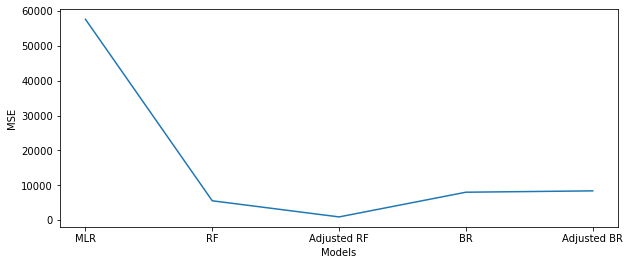

In [122]:
#Plotting the mse outputs
plt.figure(figsize = (10,4))
plt.plot(df_mse["Model Type"], df_mse["MSE"])
plt.xlabel("Models")
plt.ylabel("MSE")
plt.show()

<Figure size 720x288 with 0 Axes>

Text(0.5, 0, 'Models')

Text(0, 0.5, 'cross_val_score')

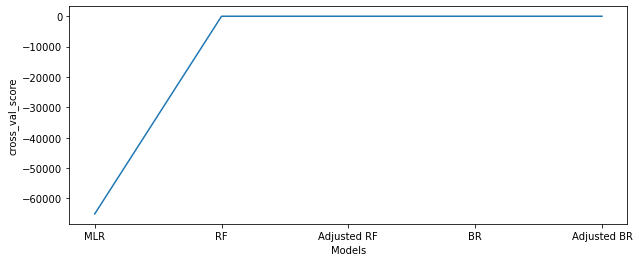

In [120]:
#Plotting the cross_val_scores outputs
plt.figure(figsize = (10,4))
plt.plot(df_scores["Model Type"], df_scores["Cross-validation score"])
plt.xlabel("Models")
plt.ylabel("cross_val_score")
plt.show()

All things considered, the Random Forest model with tuning hyperparameters has a considerably low MSE and a significant R-squared value which assist us to have more precise predictions based on the test dataset. Therefore, the Random Forest Regressor is the optimal model out of three.

## Predictions on the test data

In [139]:
#Specify subset
test_input = df_test.drop(['ID','name','description','neighborhood_overview','host_name','host_since','host_location','host_about','host_neighbourhood','neighbourhood','neighbourhood_cleansed','first_review','last_review','license'],axis=1)
#Subset size
test_input.shape

(3000, 52)

In [140]:
#Predict the corresponding prices
submission = tune_forest.predict(test_input)
submission

array([ 49.81913358, 174.03116443, 179.30484841, ..., 245.28595734,
       219.37817902, 280.38274183])

In [132]:
#Set new column for price in the test set
df_test['price'] = submission

In [149]:
#Convert 2 columns of ID and price to a submission file
df_test[['ID','price']].to_csv('submission.csv',index=False)